# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path ke file zip di Google Drive
zip_path = '/content/drive/MyDrive/New Plant Diseases Dataset.zip'

# Path ke direktori tujuan ekstraksi
extract_path = '/content/new_plant_diseases_dataset'

# Ekstraksi file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


## Data Preprocessing

### Training Image preprocessing

In [ ]:
import tensorflow as tf

# Memuat dataset dari direktori yang diekstrak
validation_set = tf.keras.utils.image_dataset_from_directory(
    extract_path + '/New Plant Diseases Dataset/valid',  # Pastikan ini adalah path ke folder validasi yang diekstrak
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

class_names = validation_set.class_names
print(class_names)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

### Validation Image Preprocessing

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    extract_path + '/New Plant Diseases Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
550/550 [==============================] - 60s 94ms/step - loss: 2.4375 - accuracy: 0.3149 - val_loss: 1.4336 - val_accuracy: 0.5776
Epoch 2/10
550/550 [==============================] - 52s 94ms/step - loss: 1.2077 - accuracy: 0.6321 - val_loss: 0.7477 - val_accuracy: 0.7777
Epoch 3/10
550/550 [==============================] - 51s 92ms/step - loss: 0.8014 - accuracy: 0.7497 - val_loss: 0.4028 - val_accuracy: 0.8761
Epoch 4/10
550/550 [==============================] - 58s 106ms/step - loss: 0.5741 - accuracy: 0.8194 - val_loss: 0.2963 - val_accuracy: 0.9075
Epoch 5/10
550/550 [==============================] - 51s 92ms/step - loss: 0.4624 - accuracy: 0.8509 - val_loss: 0.1998 - val_accuracy: 0.9395
Epoch 6/10
550/550 [==============================] - 51s 92ms/step - loss: 0.3494 - accuracy: 0.8858 - val_loss: 0.2382 - val_accuracy: 0.9214
Epoch 7/10
550/550 [==============================] - 52s 95ms/step - loss: 0.2831 - accuracy: 0.9076 - val_loss: 0.1252 - val_accuracy

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

550/550 [==============================] - 16s 28ms/step - loss: 0.0669 - accuracy: 0.9779
Training accuracy: 0.977862536907196


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 15s 28ms/step - loss: 0.0669 - accuracy: 0.9779
Validation accuracy: 0.977862536907196


### Saving Model

In [ ]:
cnn.save('trained_plant_disease_model_new.keras')
cnn.save('trained_plant_disease_model_new.h5')

from google.colab import files

# Unduh file yang telah disimpan
files.download('trained_plant_disease_model_new.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [2.437532901763916,
  1.2077200412750244,
  0.8014093637466431,
  0.5741311311721802,
  0.46239590644836426,
  0.34936320781707764,
  0.28311023116111755,
  0.23343677818775177,
  0.18771494925022125,
  0.17197534441947937],
 'accuracy': [0.31493285298347473,
  0.6320851445198059,
  0.7497154474258423,
  0.8193717002868652,
  0.8508991599082947,
  0.8857842087745667,
  0.9075802564620972,
  0.9228886961936951,
  0.9372866153717041,
  0.9427498579025269],
 'val_loss': [1.4336376190185547,
  0.7477266788482666,
  0.4028034806251526,
  0.2962739169597626,
  0.19982290267944336,
  0.23816026747226715,
  0.1251559853553772,
  0.11517911404371262,
  0.11930907517671585,
  0.0669478327035904],
 'val_accuracy': [0.5776234865188599,
  0.7776576280593872,
  0.8761097192764282,
  0.9075233340263367,
  0.9395060539245605,
  0.9214090704917908,
  0.9623264074325562,
  0.9660823941230774,
  0.9623264074325562,
  0.977862536907196]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

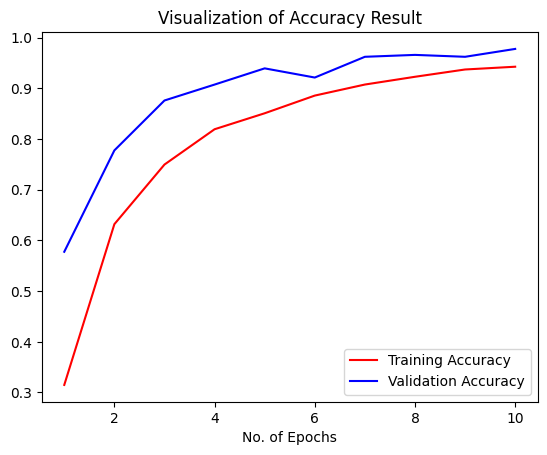

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    extract_path + '/New Plant Diseases Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 62s 3ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.98      0.99       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.97      0.99      0.98       502
                               Blueberry___healthy       0.99      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.92      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.99      0.99       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      0.

### Confusion Matrix Visualization

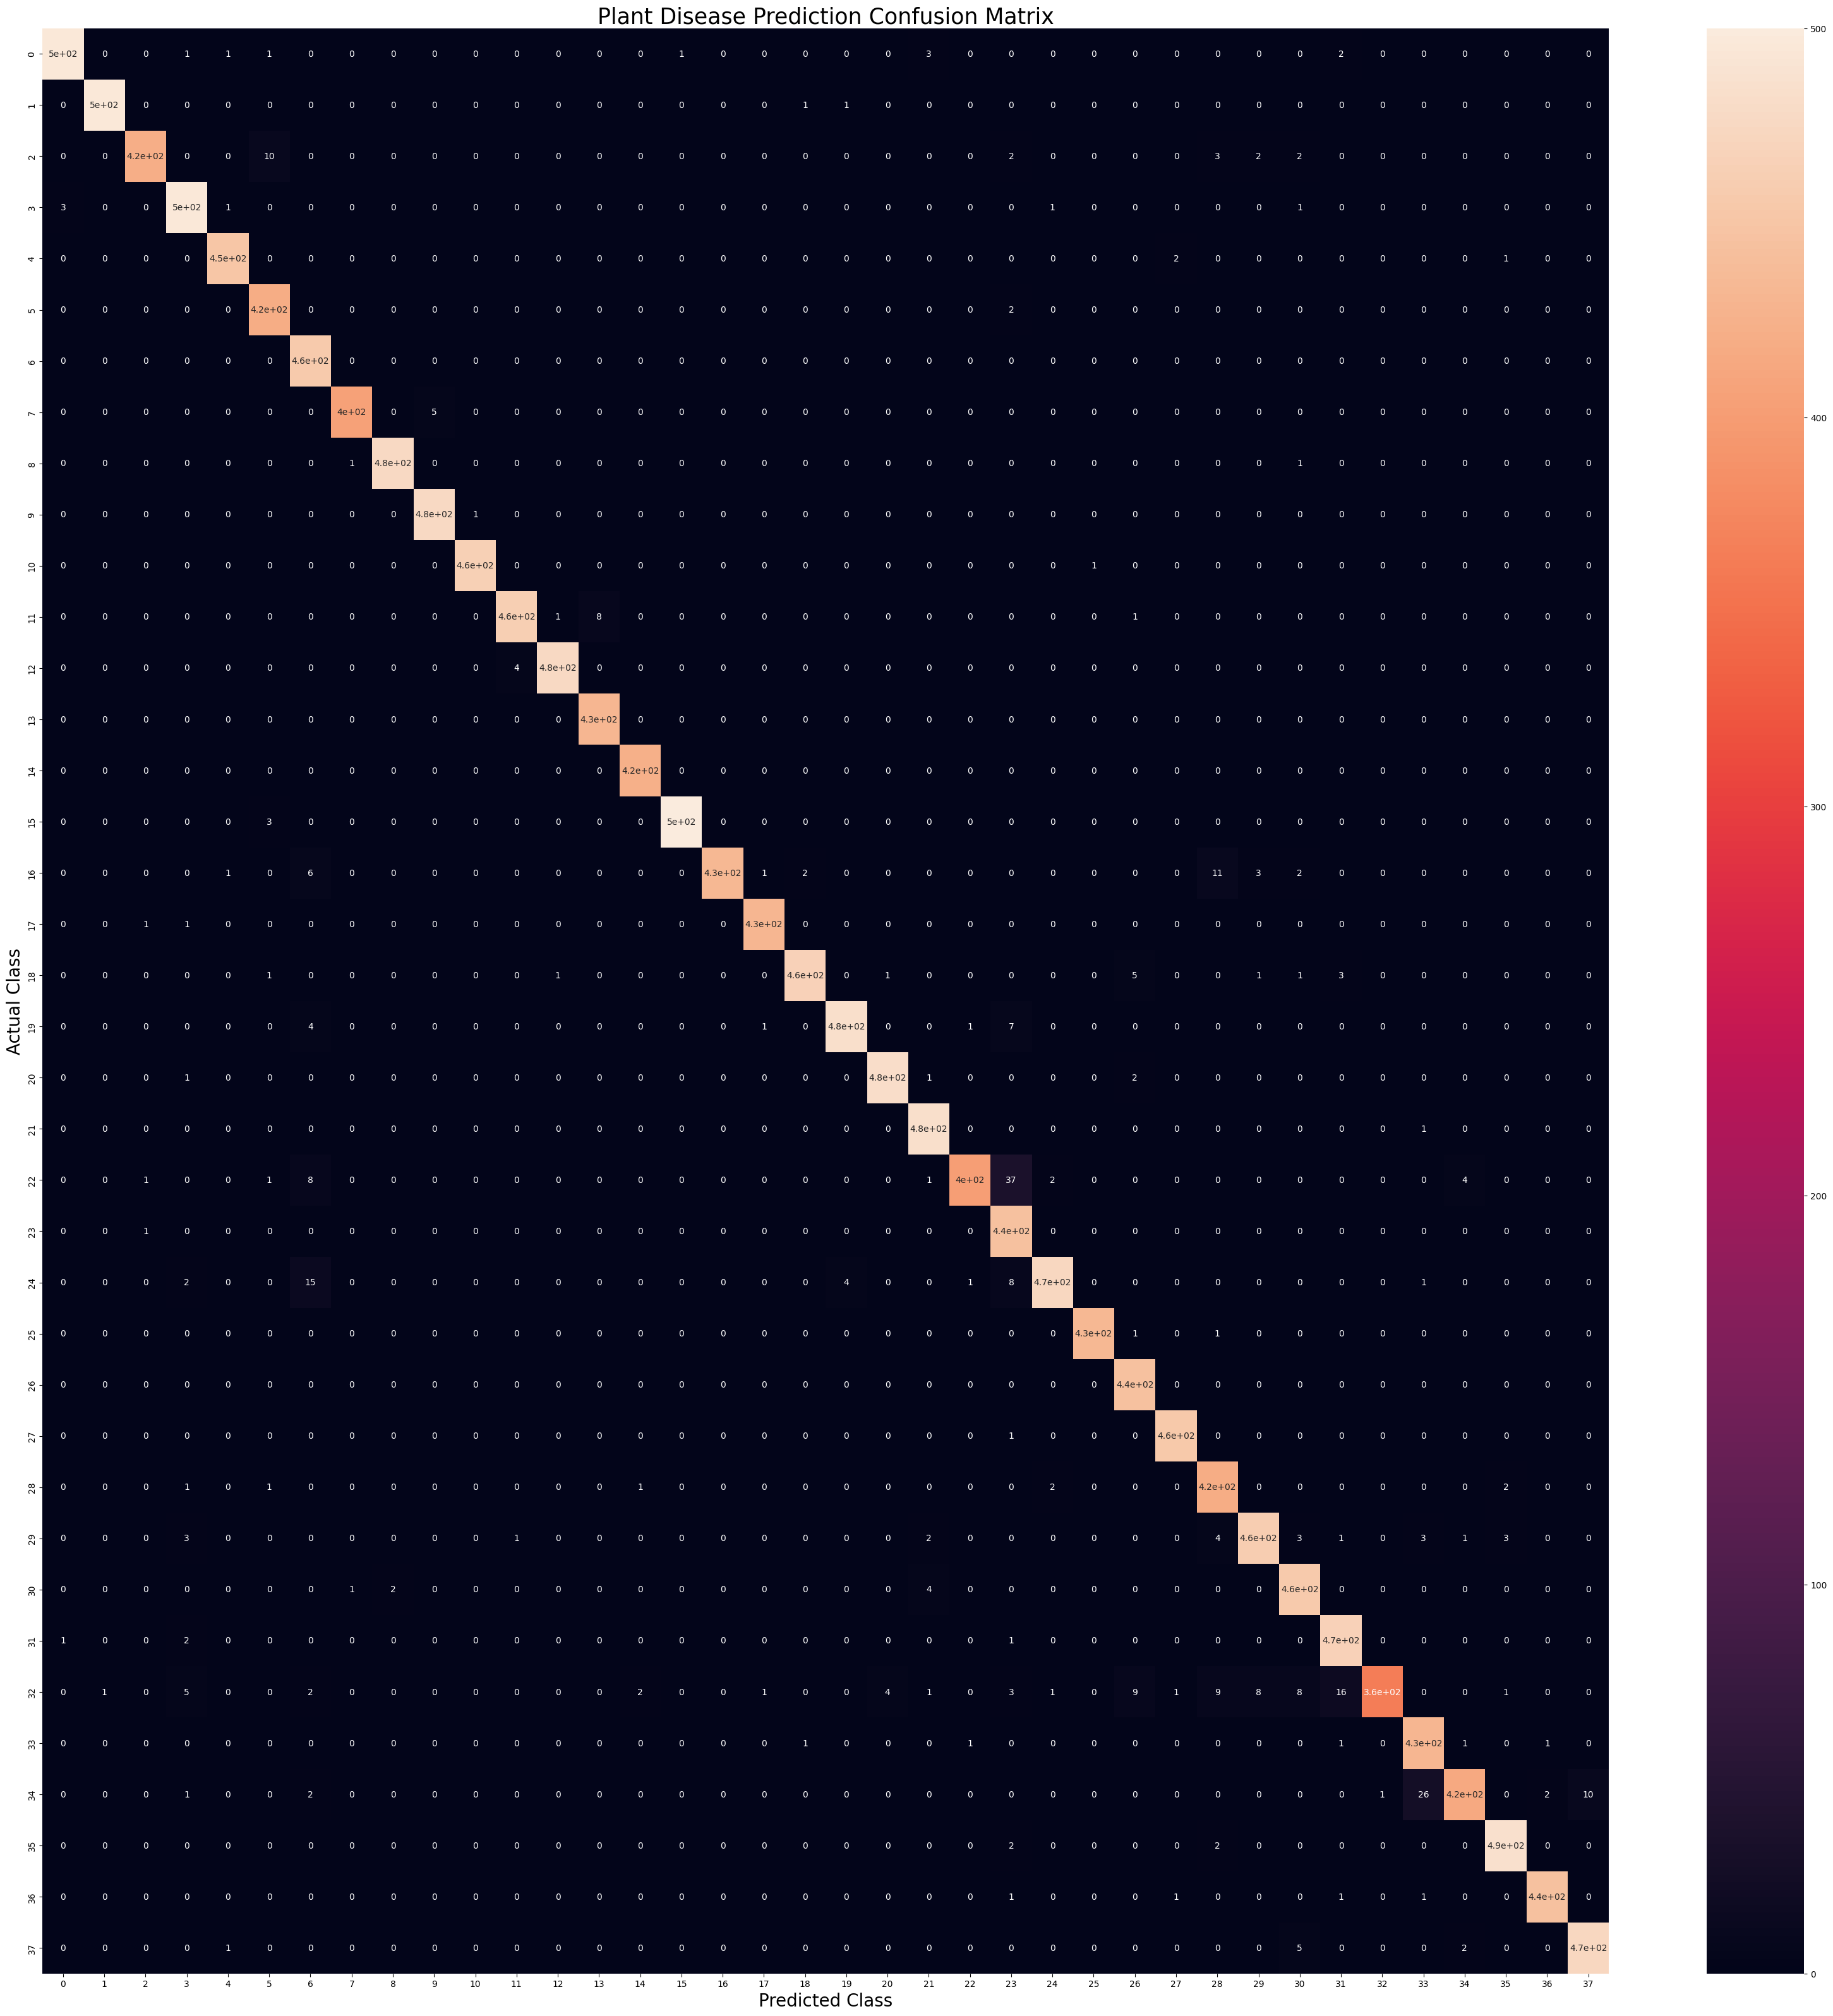

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()